# AIM: Locating impact using Computational Intelligence

#### Group 22 Members:
     Joshi, Nakul
     Joshi, Nikhil
     Kulkarni, Ashutosh
     Kunte, Rucha
     Nangare, Sangram

In [1]:
#IMPORT REQUIRED LIBRARIES

import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

import scipy.signal as signal
from os import listdir

In [2]:
#IMPORTING LIBRARIES TO BUILD NEURAL NETWORK MODELS

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats

In [3]:
#PATH LOCATIONS TO IMPORT AND STORE DATA

path = r'D:\\RWTH Masters\\Sem 3\\CIE\\Project_B\\Project_B_Data\\EPOT_Data\\'
path2 = r'D:\\RWTH Masters\\Sem 3\\CIE\\Project_B\\Project_B_Data\\Example\\'

In [4]:
#PLOTTING FUNCTIONS

def plot(data,title):
    fig,(ax0,ax1,ax2, ax3) = plt.subplots(nrows = 4, figsize = (30,12), sharex=True)
    plot_axis(ax0, data[:,0], data[:,1], 'Channel 1')
    plot_axis(ax1, data[:,0], data[:,2], 'Channel 2')
    plot_axis(ax2, data[:,0], data[:,3], 'Channel 3')
    plot_axis(ax3, data[:,0], data[:,4], 'Channel 4')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(title)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x,y,'g')
    ax.set_title(title)
    ax.set_ylim([min(y)-np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)

In [5]:
def call_method(data):
    f = np.zeros(data.shape)
    return f

In [6]:
#FUNCTION FOR SWAPPING THE CHANNEL DATA

def Swap_quad2(data, name,x,y): 
    fpath = path2+name
    f2 = call_method(data)
    f2[:,0] = data[:,0]
    f2[:,1] = data[:,1]
    f2[:,2] = data[:,4]
    f2[:,3] = data[:,3]
    f2[:,4] = data[:,2]
    #plot(f2, name)
    df2 = pd.DataFrame({'Time': f2[:,0], 'Channel 1': f2[:,1], 'Channel 2': f2[:,2], 'Channel 3': f2[:,3], 'Channel 4': f2[:,4],'x coordinate':x, 'y coordinate':y})
    df2.to_csv(fpath, index = None)

def Swap_quad3(data, name,x,y):
    fpath = path2+name
    f3 = call_method(data)
    f3[:,0] = data[:,0]
    f3[:,1] = data[:,3]
    f3[:,2] = data[:,4]
    f3[:,3] = data[:,1]
    f3[:,4] = data[:,2]
    #plot(f3, name)
    df3 = pd.DataFrame({'Time': f3[:,0], 'Channel 1': f3[:,1], 'Channel 2': f3[:,2], 'Channel 3': f3[:,3], 'Channel 4': f3[:,4],'x coordinate':x, 'y coordinate':y})
    df3.to_csv(fpath, index = None)

def Swap_quad4(data, name,x,y):
    fpath = path2+name
    f4 = call_method(data)
    f4[:,0] = data[:,0]
    f4[:,1] = data[:,3]
    f4[:,2] = data[:,2]
    f4[:,3] = data[:,1]
    f4[:,4] = data[:,4] 
    #plot(f4, name)
    df4 = pd.DataFrame({'Time': f4[:,0], 'Channel 1': f4[:,1], 'Channel 2': f4[:,2], 'Channel 3': f4[:,3], 'Channel 4': f4[:,4],'x coordinate':x, 'y coordinate':y})
    df4.to_csv(fpath, index = None)

In [7]:
#FUNCTION FOR DATA AUGMENTATION

def Augment(x1,y1,data,name):
    dff2 = pd.DataFrame() 
    dff3 = pd.DataFrame()
    dff4 = pd.DataFrame()
    dx = x1-250
    dy = y1-250
    #plot(data, name)   
    x2 = 250-dx
    y2 = y1
    x3 = 250-dx
    y3 = 250-dy
    x4 = x1
    y4 = y3
    name1 = 'EPOT_'+str(x1)+'_'+str(y1)+'.csv'
    name2 = 'EPOT_'+str(x2)+'_'+str(y2)+'.csv'
    name3 = 'EPOT_'+str(x3)+'_'+str(y3)+'.csv'
    name4 = 'EPOT_'+str(x4)+'_'+str(y4)+'.csv'
    dff1 = pd.DataFrame({'Time': data[:,0], 'Channel 1': data[:,1], 'Channel 2': data[:,2], 'Channel 3': data[:,3], 'Channel 4': data[:,4],'x coordinate':x1, 'y coordinate':y1})
    dff1.to_csv(path2+name1, index = None)
    dff2 = Swap_quad2(data, name2,x2,y2)
    dff3 = Swap_quad3(data, name3,x3,y3)
    dff4 = Swap_quad4(data, name4,x4,y4)
    return dff1,dff2, dff3, dff4

In [8]:
#FUNCTION FOR LINEAR SYSTEMATIC SAMPLING

import random

n = 20000
size_systematic_sample = 800
interval = (n // size_systematic_sample)

random_number = random.randint(0,1)

def systematic_sampling(df, step):
    
    indexes = np.arange(random_number, len(df)-1, step=step)
    systematic_sample = df[indexes]
    return systematic_sample

In [9]:
def append_data (dfff):
    
    ad1 = dfff[0].append(dfff[1], ignore_index = True)
    ad2 = ad1.append(dfff[2], ignore_index = True)
    ad3 = ad2.append(dfff[3], ignore_index = True)
    
    return ad3    

In [10]:
#CODE TO SAMPLE, AUGMENT AND STORE DATA IN RESPECTIVE .csv FILES

import os
import os.path
final_data = pd.DataFrame()
for x in range(250, 330, 5):
    for y in range (250, 330, 5):
        name = 'EPOT_'+str(x)+'_'+str(y)+'.mat'
        path1 = path+name
        #print(os.path.exists(path1))
        if (os.path.exists(path1) == True):
            data = scipy.io.loadmat(path1)
            data = data['num_data']
            
            systematic_sample = systematic_sampling(data,interval)
            dfff = Augment(x,y,systematic_sample,name)
        else: break

In [11]:
#CODE TO IMPORT DATA FROM THE PREVIOUSLY CREATED .csv FILES, APPEND THE FILES AND STORE IN A SINGLE .csv FILE

final_data = pd.DataFrame()
for x in range(175, 330, 5):
    for y in range (175, 330, 5):
        name = 'EPOT_'+str(x)+'_'+str(y)+'.csv'
        path1 = path2+name
        #print(os.path.exists(path1))
        if os.path.exists(path1) == True:
            data = pd.read_csv(path1)
            final_data = final_data.append(data,ignore_index=True)
            final_data.to_csv('Data_800.csv', index = None)

# Pre-processing of Training Data

In [3]:
#IMPORT COMBINED DATA
final_data = pd.read_csv('Data.csv')
#print(final_data)
train_data = final_data[['Time','Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']]
label_data = final_data[['x coordinate', 'y coordinate']]

label_data = label_data.astype('float64')

In [4]:
#FUNCTION TO EXTRACT DATA FROM THE CREATED .csv (DataFrame) TO A NUMPY ARRAY 

freq = 400
frame_size = int(freq*1)
hop_size = int(freq*1)

def get_frames(df, df2, frame_size, hop_size):
    
    N_FEATURES = 5
    
    frames = []
    labels = []
    
    for j in range(0, len(df) , hop_size):
        time = df['Time'].values[j:j+frame_size]
        ch1 = df['Channel 1'].values[j:j+frame_size]
        ch2 = df['Channel 2'].values[j:j+frame_size]
        ch3 = df['Channel 3'].values[j:j+frame_size]
        ch4 = df['Channel 4'].values[j:j+frame_size]
        
        label = stats.mode(df2[j:j+frame_size])[0][0]
        frame = np.column_stack((time,ch1,ch2,ch3,ch4))
        frames.append(frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [5]:
x,y = get_frames(train_data, label_data, frame_size, hop_size)
print(x.shape,y.shape)

(709, 400, 5) (709, 2)


## KNN And DTR

In [6]:
#FLATTENING AND APPENDING DATA TO GET A 2-D ARRAY

i = 0
data = np.empty(shape=(1,2000))

for i in range (0,709,1):
    final_data_flat = x[i,:,:].flatten()
    data = np.vstack([data, final_data_flat])
    #data = np.append(data,final_data_flat)
    
    
data = np.delete(data, 0, 0)
data.shape

#TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size = 0.1, random_state=42)
x_train.shape


from sklearn.preprocessing import StandardScaler, MinMaxScaler
#USING MINMAX SCALER TO NORMALIZE THE DATA
scaler1 = MinMaxScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.fit_transform(x_test)

## KNN

In [7]:
#IMPLEMENTING KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 4).fit(x_train, y_train)
knn_accuracy = knn.score(x_test, y_test)
print('KNN accuracy: ',knn_accuracy)

xtest = data[3]
xtest = np.reshape(xtest,(1,2000))
y_pred = knn.predict(x_test)

xDev = np.mean(np.abs(y_test[:,0]-y_pred[:,0]))
yDev = np.mean(np.abs(y_test[:,1]-y_pred[:,1]))
print('KNN deviation: ','x =',xDev, 'y =',yDev)

from sklearn.metrics import mean_squared_error
knn_mse =mean_squared_error(y_test, y_pred)
print("KNN Mean Squared Error:",knn_mse)

KNN accuracy:  0.9892431155812842
KNN deviation:  x = 1.5316901408450705 y = 2.165492957746479
KNN Mean Squared Error: 19.938380281690144


## Decision Tree Regressor (DTR)

In [8]:
#IMPLEMENTING DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(min_samples_split = 4).fit(x_train, y_train)
dtr_accuracy = DTR.score(x_test, y_test)
print('DTR accuracy: ',dtr_accuracy)
p = DTR.predict(x_test)

dtr_mse = mean_squared_error(y_test, y_pred)
print("DTR Mean Squared Error:",dtr_mse)

DTR accuracy:  -0.42075766396238945
DTR Mean Squared Error: 19.938380281690144


## Pre-processing of Experimental Data

In [9]:
#FUNCTION TO CONVERT .txt FILE INTO .csv AND STORE IT IN THE 'CSV' FOLDER

def conv_File(name, Folder):
    fpath = r'D:\RWTH Masters\Sem 3\CIE\Project_B\Project_B_Data\Experimental_validation\\'+Folder+'\\'+name+'.txt'
    path = r'D:\RWTH Masters\Sem 3\CIE\Project_B\Project_B_Data\Experimental_validation\\copy\\'+name+'.txt'
    path2 = r'D:\RWTH Masters\Sem 3\CIE\Project_B\Project_B_Data\Experimental_validation\\CSV\\'+name+'.csv'

    lines = []
        # Read file
    with open(fpath, 'r') as fp:
        # read an store all lines into list
        lines = fp.readlines()

    # Write file
    with open(path, 'w') as fp:
        # iterate each line
        for number, line in enumerate(lines):
            # delete line 1 to 7. or pass any Nth line you want to remove
            # note list index starts from 0
            if number not in [0,1,2,3,4,5,6]:
                fp.write(line)
    
    
    df = pd.read_csv(path,delimiter = '\t')
    df.to_csv(path2, index = None)
    df2 = pd.read_csv(path2,converters={'y': lambda x: float(x.replace('.','').replace(',','.'))})
      
    f = lambda x: str.replace(x, u',', u'.')
    df2['s'] = df2['s'].map(f)
    df2['V'] = df2['V'].map(f)
    df2['V.1'] = df2['V.1'].map(f)
    df2['V.2'] = df2['V.2'].map(f)
    df2['V.3'] = df2['V.3'].map(f)

    df2
    df2.dtypes

    #df2.columns = ('Time (s)', 'Ch A1 (V)', 'Ch A2 (V)', 'Ch A3 (V)', 'Ch A4 (V)')
    convert_dict = {'s': float, 'V': float, 'V.1': float, 'V.2': float, 'V.3': float}
  
    df2 = df2.astype(convert_dict)
    x1 = df2.rename(columns={'s': 'Time (s)', 'V': 'Ch A1 (V)', 'V.1': 'Ch A2 (V)', 'V.2': 'Ch A3 (V)', 'V.3': 'Ch A4 (V)'})
    #x1.to_csv('D:\\RWTH Masters\\Sem 3\\CIE\\Project_B\\Project_B_Data\\EXP\\'+name+'.csv', index = None)
    
    return df2

In [10]:
#CHANGING THE COLUMN NAMES
def Rename(df2):
    x1 = df2.rename(columns={'s': 'Time (s)', 'V': 'Ch A1 (V)', 'V.1': 'Ch A2 (V)', 'V.2': 'Ch A3 (V)', 'V.3': 'Ch A4 (V)'})
    return x1

In [11]:
#ACQUIRING THE FREQUENCY OF THE DATA
def ToNumpy(x1):
    X1 = x1.to_numpy()
    #plot(X1, '230,245')
    return X1

In [39]:
#FUNCTION TO CUT THE EXPERIMENTAL DATA
#This function cuts the data from before the first peak (can be adjusted by j) up to 0.00020 seconds from the start point

def cut_data(data, freq):
    data1 = abs(data[:,1])
    data2 = abs(data[:,2])
    data3 = abs(data[:,3])
    data4 = abs(data[:,4])
    peaks1, _ = signal.find_peaks(data1,height=0.025)
    peaks2, _ = signal.find_peaks(data2,height=0.025)
    peaks3, _ = signal.find_peaks(data3,height=0.025)
    peaks4, _ = signal.find_peaks(data4,height=0.025)
    #print (peaks1[0],peaks2[0],peaks3[0],peaks4[0])
    #print (data[peaks1[0],0],data[peaks2[0],0],data[peaks3[0],0],data[peaks4[0],0])
    peak = min(peaks1[0],peaks2[0],peaks3[0],peaks4[0])
    
    z = 400
    while True:
        i = peak-z
        j = peak-10
        edata = data[j:-i, :]
        l = len(edata)-1
        fdata = edata[l,0]-edata[0,0]
        if (fdata <= 0.00020):
            break
        z = z-1
    return edata

In [40]:
#FUNCTION TO PLOT THE PEAKS

def peak_plot(data_abs,peaks):
    plt.subplots(nrows = 1, figsize = (30,12), sharex=True)
    plt.plot(data_abs)
    plt.plot(peaks, data_abs[peaks], "X")
    plt.plot(np.zeros_like(data_abs), "--", color="gray")
    plt.show()

In [41]:
#FUNCTION TO RESAMPLE THE DATA

def resample(Data,freq):
    resampled_data = signal.resample(Data[:,1:5], freq)
    a = 0.00020/(freq-1)
    t1 = np.c_[0:0.00020+a:a] 
    #print(t1.shape)
    resampled_data = np.column_stack((t1, resampled_data))
    #resampled_data = pd.DataFrame(resampled_data)
    #resampled_data = resampled_data.rename(columns={0 : "Time", 1: "Ch A1 (V)", 2: "Ch A2 (V)", 3 : "Ch A3 (V)", 4 : "Ch A4 (V)"}, errors="raise")
    return resampled_data

In [42]:
def SWAP(df):
    f3 = np.zeros(df.shape)

    f3[:,0] = df[:,0]
    f3[:,1] = df[:,1]
    f3[:,2] = df[:,2]
    f3[:,3] = df[:,4]
    f3[:,4] = df[:,3]
    
    return f3

In [43]:
def Pre_processing(Folder,name):
    df2 = conv_File(name, Folder)
    x1 = Rename(df2)
    X1 = ToNumpy(x1)
    freq1 = np.round(len(X1)/X1[(len(X1)-1),0])
    #print(freq1)
    
    edata = cut_data(X1, freq1)
    #print(edata.shape)
    edata[:,0] = edata[:,0]-edata[0,0]
    df = resample(edata,400)
    #print(df.shape)
    
    df = SWAP(df)
    df[:,1:5] = df[:,1:5]*-1
    return df

## Predictions for DTR and KNN

In [36]:
def DTR_KNN_Prediction(df):
    df_KNN = df
    df_KNN = df_KNN.flatten()
    df_KNN = np.reshape(df_KNN,(1,2000))

    p = DTR.predict(df_KNN)
    print('DTR prediction: ',p)

    ypred = knn.predict(df_KNN)
    print('KNN prediction: ',ypred)

## CNN

In [9]:
#TRAIN-TEST SPLIT FOR CNN
from sklearn.model_selection import train_test_split
Cx_train, Cx_test, Cy_train, Cy_test = train_test_split(x,y,test_size = 0.1, random_state=42)

#STANDARDISING THE DATA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler1 = StandardScaler()
for i in range(0,638,1):
    Cx_train[i,:,:] = scaler1.fit_transform(Cx_train[i,:,:])
for i in range(0,71,1):
    Cx_test[i,:,:] = scaler1.fit_transform(Cx_test[i,:,:])
    
Cx_train = Cx_train.reshape(638, 400, 5, 1)
Cx_test = Cx_test.reshape(71, 400, 5, 1)

In [11]:
#BUILDING A CNN MODEL

model = Sequential()
model.add(Conv2D(200,(4, 1),activation = 'relu',input_shape = Cx_train[0].shape))
model.add(MaxPool2D(pool_size=(3, 1)))
#model.add(Dropout(0.6))

model.add(Conv2D(150, (3, 1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(3, 1)))


model.add(Conv2D(100, (3, 1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(3, 1)))

model.add(Conv2D(50, (2, 1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 1)))

model.add(Conv2D(25, (2, 1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 1)))

model.add(Flatten())

model.add(Dense(200,activation="elu"))
#model.add(Dense(50,activation="elu"))
model.add(Dense(2,activation="elu"))

In [12]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(Cx_train, Cy_train, epochs = 25, batch_size = 5, verbose=1)

Epoch 1/25
128/128 [==============================] - 13s 81ms/step - loss: 8629.2617 - accuracy: 0.7273
Epoch 2/25
128/128 [==============================] - 7s 53ms/step - loss: 388.1263 - accuracy: 0.8981
Epoch 3/25
128/128 [==============================] - 10s 76ms/step - loss: 261.5098 - accuracy: 0.8966
Epoch 4/25
128/128 [==============================] - 10s 81ms/step - loss: 225.7711 - accuracy: 0.8903
Epoch 5/25
128/128 [==============================] - 10s 80ms/step - loss: 168.7958 - accuracy: 0.9436
Epoch 6/25
128/128 [==============================] - 9s 67ms/step - loss: 115.2272 - accuracy: 0.9310
Epoch 7/25
128/128 [==============================] - 4s 33ms/step - loss: 94.1585 - accuracy: 0.9389
Epoch 8/25
128/128 [==============================] - 10s 78ms/step - loss: 81.2162 - accuracy: 0.9342
Epoch 9/25
128/128 [==============================] - 10s 74ms/step - loss: 67.0098 - accuracy: 0.9404
Epoch 10/25
128/128 [==============================] - 10s 80ms/step 

## CNN Loss and Accuracy Visualization

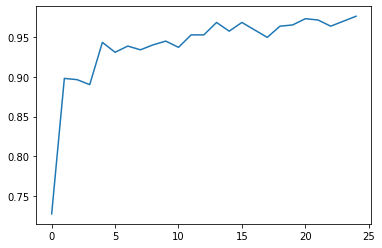

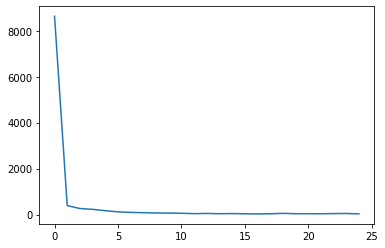

In [13]:
plt.plot(history.history['accuracy'])
plt.show()
plt.plot(history.history['loss'])
plt.show()

In [14]:
Ctest_eval = model.evaluate(Cx_test, Cy_test, verbose=1)
print('CNN Test loss:', Ctest_eval[0])
print('CNN Test accuracy:', Ctest_eval[1])
Cy_pred = model.predict(Cx_test)
xDev = np.mean(np.abs(Cy_test[:,0]-Cy_pred[:,0]))
yDev = np.mean(np.abs(Cy_test[:,1]-Cy_pred[:,1]))
print('CNN Deviation: x =',xDev,'y =',yDev)

3/3 [==============================] - 1s 64ms/step - loss: 24.5489 - accuracy: 0.9718
CNN Test loss: 24.548934936523438
CNN Test accuracy: 0.9718309640884399
CNN Deviation: x = 4.6803861806090445 y = 3.272697986011774


## Predictions for CNN

In [45]:
def CNN_Prediction(df):
    scaler1 = StandardScaler()
    df_CNN = scaler1.fit_transform(df)

    df_CNN1 = pd.DataFrame(df_CNN)
    df_CNN2 = df_CNN1.rename(columns={ 0: "Time", 1: "Channel 1", 2: "Channel 2", 3 : "Channel 3", 4 : "Channel 4"}, errors="raise")

    #print(df_CNN2)
    Ctest = model.predict(np.expand_dims(df_CNN2, 0))
    #test = test - [20, 20]
    print('CNN prediction: ',Ctest)
    #print(name)

# RNN

In [24]:
#APPENDING THE DATA

i = 0
data = np.empty(shape=(1,2000))

#data = pd.DataFrame()
#data = data.to_numpy()
for i in range (0,709,1):
    final_data_flat = x[i,:,:].flatten()
    data = np.vstack([data, final_data_flat])
    #data = np.append(data,final_data_flat)
    
    
data = np.delete(data, 0, 0)
data.shape

#TRAIN-TEST SPLIT FOR RNN
from sklearn.model_selection import train_test_split
Rx_train, Rx_test, Ry_train, Ry_test = train_test_split(data,y,test_size = 0.1, random_state=42)

Rx_train = Rx_train.reshape(638,1,2000)
Rx_test = Rx_test.reshape(71,1,2000)

In [27]:
#BUILDING THE RNN MODEL

from keras.layers import Dense, MaxPool1D , Flatten, Dropout, AvgPool2D, SimpleRNN, LSTM

model_RNN = Sequential()
model_RNN.add(LSTM(200, input_shape=Rx_train[0].shape, activation='elu', return_sequences=True))
model_RNN.add(MaxPool1D(1,4))
model_RNN.add(LSTM(100, input_shape=Rx_train[0].shape, activation='elu', return_sequences=True))
model_RNN.add(MaxPool1D(1,4))
model_RNN.add(LSTM(50, input_shape=Rx_train[0].shape, activation='elu'))
model_RNN.add(Flatten())
model_RNN.add(Dense(100))
model_RNN.add(Dense(50))
model_RNN.add(Dense(2))

In [28]:
model_RNN.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history1 = model_RNN.fit(Rx_train, Ry_train, epochs = 100, batch_size = 5, verbose=1)

Epoch 1/100
128/128 [==============================] - 10s 19ms/step - loss: 16990.8398 - accuracy: 0.5298
Epoch 2/100
128/128 [==============================] - 3s 20ms/step - loss: 1759.9606 - accuracy: 0.5251
Epoch 3/100
128/128 [==============================] - 2s 20ms/step - loss: 1315.7844 - accuracy: 0.6395
Epoch 4/100
128/128 [==============================] - 3s 20ms/step - loss: 599.5684 - accuracy: 0.8950
Epoch 5/100
128/128 [==============================] - 2s 19ms/step - loss: 314.8555 - accuracy: 0.9091
Epoch 6/100
128/128 [==============================] - 2s 19ms/step - loss: 237.2280 - accuracy: 0.9295
Epoch 7/100
128/128 [==============================] - 2s 19ms/step - loss: 224.3346 - accuracy: 0.9216
Epoch 8/100
128/128 [==============================] - 3s 20ms/step - loss: 185.7151 - accuracy: 0.9310
Epoch 9/100
128/128 [==============================] - 3s 20ms/step - loss: 115.6151 - accuracy: 0.9514 0s - loss: 111.9646 - accuracy: 0.
Epoch 10/100
128/128 [==

In [29]:
Rtest_eval = model_RNN.evaluate(Rx_test, Ry_test, verbose=1)
print('RNN Test loss:', Rtest_eval[0])
print('RNN Test accuracy:', Rtest_eval[1])
Ry_pred = model_RNN.predict(Rx_test)
xDev = np.mean(np.abs(Ry_test[:,0]-Ry_pred[:,0]))
yDev = np.mean(np.abs(Ry_test[:,1]-Ry_pred[:,1]))
print('RNN Deviation: x =',xDev,'y =',yDev)

3/3 [==============================] - 1s 7ms/step - loss: 37.7643 - accuracy: 0.9155
RNN Test loss: 37.76425552368164
RNN Test accuracy: 0.9154929518699646
RNN Deviation: x = 4.570091140102333 y = 4.065875416070643


## RNN Loss and Accuracy Visualization

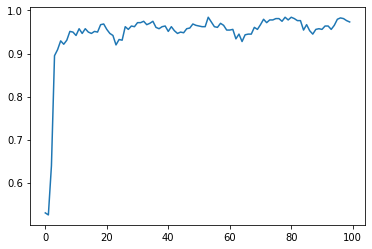

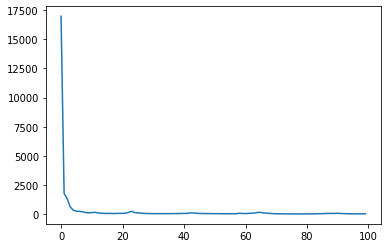

In [30]:
plt.plot(history1.history['accuracy'])
plt.show()
plt.plot(history1.history['loss'])
plt.show()

## Predictions for RNN

In [48]:
def RNN_Prediction(df):
    df_RNN = df.flatten()
    df_RNN = np.reshape(df_RNN,(1,2000))
    Rtest = model_RNN.predict(np.expand_dims(df_RNN, 0))
    print('RNN prediction: ',Rtest[0])
    #print(name)

## Data Export

In [33]:
print('DTR accuracy: ',dtr_accuracy)
print("DTR Mean Squared Error:",dtr_mse)
print('KNN accuracy: ',knn_accuracy)
print("KNN Mean Squared Error:",knn_mse)
print('CNN Test loss:', Ctest_eval[0])
print('CNN Test accuracy:', Ctest_eval[1])
print('RNN Test loss:', Rtest_eval[0])
print('RNN Test accuracy:', Rtest_eval[1])

DTR accuracy:  -0.6581736618495537
DTR Mean Squared Error: 19.938380281690144
KNN accuracy:  0.9892431155812842
KNN Mean Squared Error: 19.938380281690144
CNN Test loss: 16.256685256958008
CNN Test accuracy: 1.0
RNN Test loss: 37.76425552368164
RNN Test accuracy: 0.9154929518699646


In [49]:
Folder = 'Group22'
name = 'impact_xy_086'

df = Pre_processing(Folder,name)
DTR_KNN_Prediction(df)
CNN_Prediction(df)
RNN_Prediction(df)

DTR prediction:  [[240. 275.]]
KNN prediction:  [[250.   256.25]]
CNN prediction:  [[246.76338 247.8158 ]]
RNN prediction:  [253.05037 251.2779 ]
